In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

In [4]:
month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

C:\Users\lamarwells\AppData\Local\Temp\ipykernel_20868\1609213663.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


In [5]:
new_pumpkins = pd.DataFrame(
    {'Month':month,
     'Day':day_of_year,
     'Package':pumpkins['Package'],
     'Variety':pumpkins['Variety'],
     'City':pumpkins['City Name'],
     'Low Price':pumpkins['Low Price'],
     'High Price':pumpkins['High Price'],
     'Price':price}
)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), "Price"] = price*2

new_pumpkins.head()

,Month,Day,Package,Variety,City,Low Price,High Price,Price
70,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,13.636364
71,9,267,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,16.363636
72,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,16.363636
73,10,274,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,15.454545
74,10,281,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,13.636364


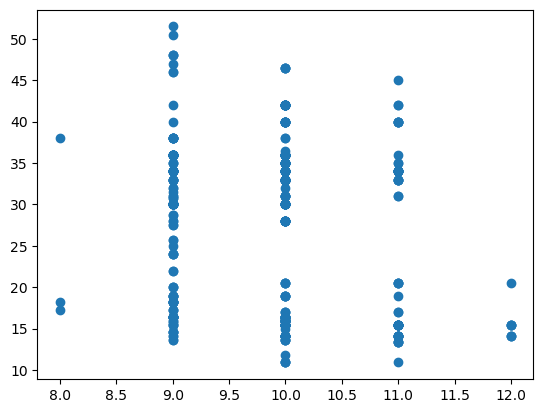

In [6]:
plt.scatter('Month', 'Price', data=new_pumpkins)

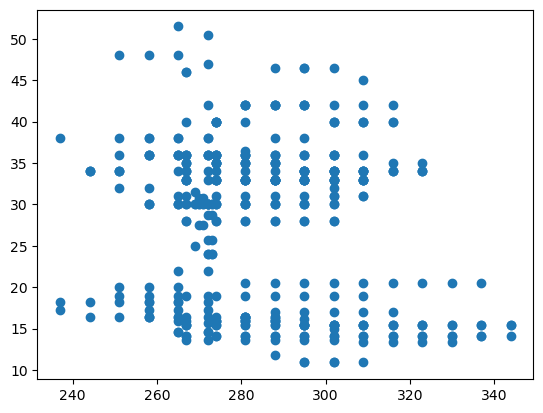

In [8]:
plt.scatter('Day', 'Price', data=new_pumpkins)

In [9]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['Day'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


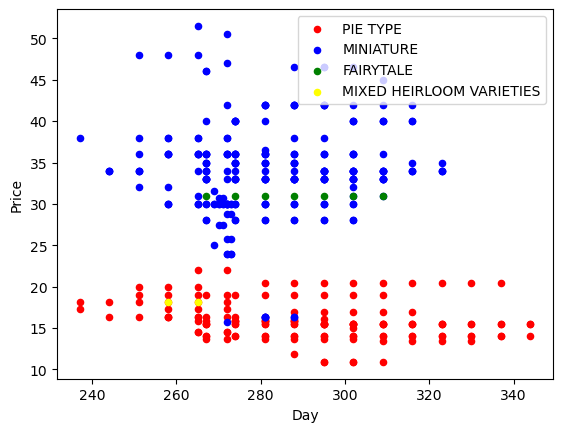

In [12]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('Day','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

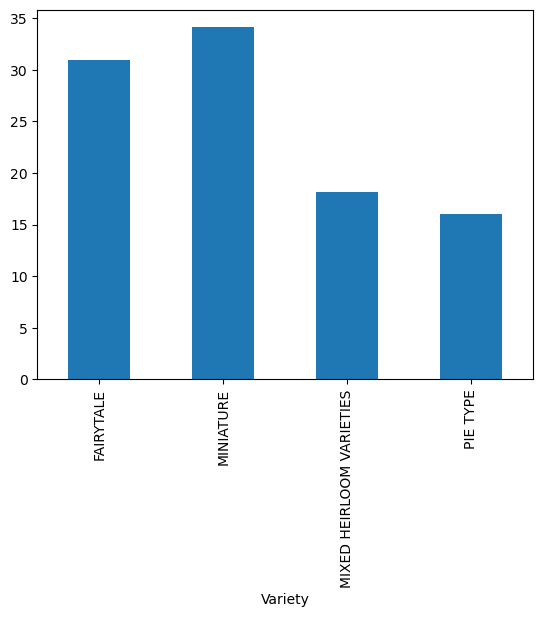

In [13]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
X = new_pumpkins['Day'].to_numpy().reshape(-1,1)
y= new_pumpkins['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f"Mean Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)")

Mean Error: 10.6 (37.9%)


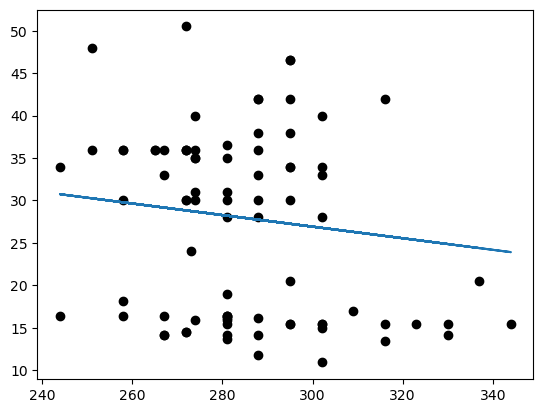

In [19]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred)